In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
#import tensorflow as tf
#from tensorflow.contrib import skflow
testset=pd.read_csv('/home/aditya/Desktop/kaggle/titanic/test.csv')
trainset=pd.read_csv('/home/aditya/Desktop/kaggle/titanic/train.csv')
#trainset.mean()
#trainset.head()
grouping=trainset.groupby(['Pclass','Sex']).mean()
grouping

/home/aditya/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

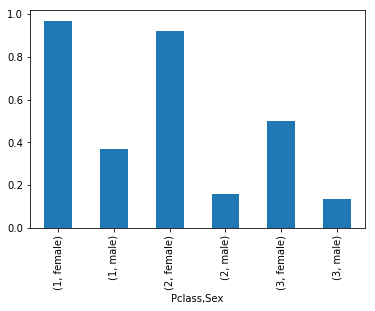

In [2]:
grouping['Survived'].plot.bar()

In [3]:
trainset = trainset.drop(['Ticket','Cabin','Name'], axis=1)

In [4]:
trainset = trainset.dropna()

In [5]:
trainset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
10,11,1,3,female,4.0,1,1,16.7000,S


In [6]:
def preprocess_titanic_df(df):
    processed_df = trainset.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    return processed_df

In [7]:
processed_df = preprocess_titanic_df(trainset)

In [8]:
processed_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0
10,11,1,3,0,4.0,1,1,16.7000,2


In [9]:
X = processed_df.drop(['Survived'], axis=1).values
y = processed_df['Survived'].values


In [10]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [11]:
clf = ske.GradientBoostingClassifier(n_estimators=50)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.81818181818181823

In [12]:
testset = testset.drop(['Ticket','Cabin','Name'], axis=1)
testset.dropna()
testset['Age'] = testset['Age'].interpolate()
testset['Fare'] = testset['Fare'].interpolate()
testset


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [13]:
def preprocess_titanic_df1(df):
    processed_df = testset.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    return processed_df
processed_testset = preprocess_titanic_df1(testset)
X_res = processed_testset.values


In [14]:
y_results = clf.predict(X_res)
print y_results.shape
output = np.column_stack((X_res[:,0],y_results))
df_results = pd.DataFrame(output.astype('int'),columns=['PassengerID','Survived'])
df_results.to_csv('titanic_results.csv',index=False)

(418,)
